In [25]:
import sys
import random
import os
import numpy as np
import pandas as pd
import iisignature as iis
import matplotlib.pyplot as plt
import gudhi
from gudhi import plot_persistence_diagram
from gudhi import plot_persistence_density
from gtda.homology import VietorisRipsPersistence
from gtda.homology import FlagserPersistence
from gtda.diagrams import PersistenceEntropy
from gtda.diagrams import Amplitude
from gudhi.representations.vector_methods import Entropy
from gtda.diagrams import PairwiseDistance
from gtda.plotting import plot_diagram
import numpy.random as rd
import gudhi.representations
import random
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp
%run FUNCTIONS.ipynb

In [26]:
ts=np.loadtxt("NYSE_119stocks_2000Jan_2021June_6digits.txt")
ts_z=zscore(ts,axis=0)

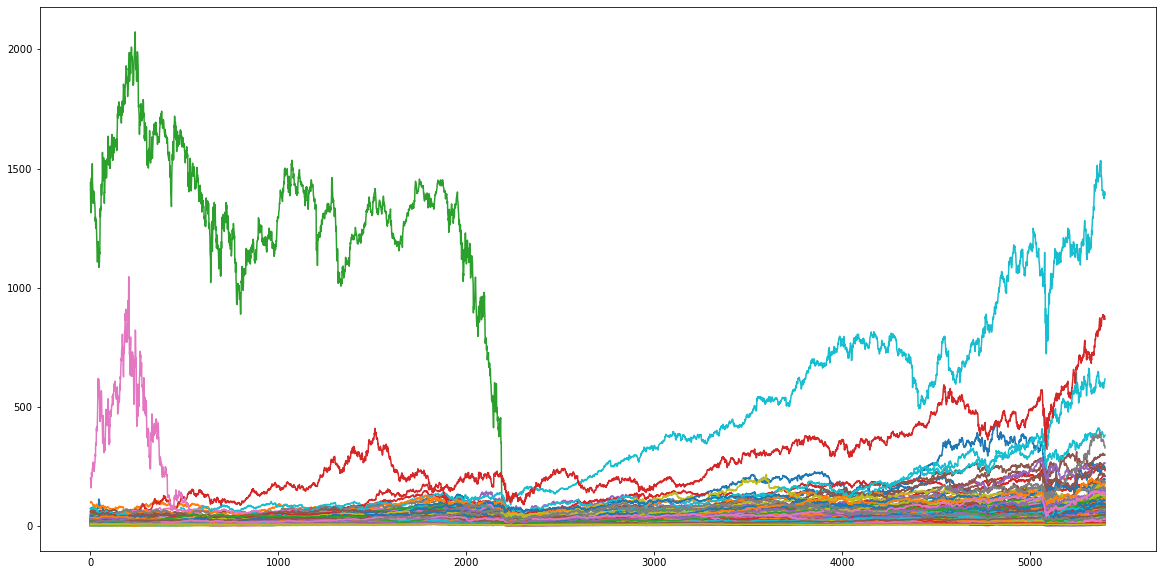

In [27]:
plt.figure(figsize=(20,10))
for i in range(119):
    plt.plot(range(5400),ts[:,i])
plt.show()

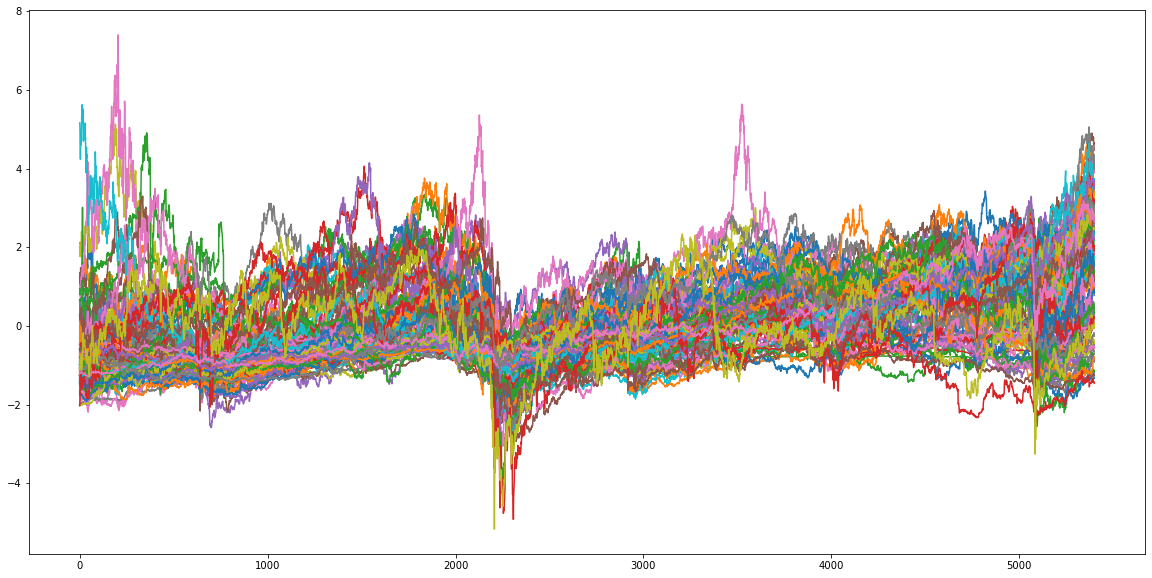

In [28]:
plt.figure(figsize=(20,10))
for i in range(119):
    plt.plot(range(5400),ts_z[:,i])
plt.show()

In [36]:
length=80
indifference_value=0.05
en,am=en_am_cl_sliding(ts,length) 
en_z,am_z=en_am_cl_sliding(ts_z,length)
hyp,en_1_h,en_0_h=en_h_hyp_v_sliding(ts,length,indifference_value)
hyp_z,en_1_h_z,en_0_h_z=en_h_hyp_v_sliding(ts_z,length,indifference_value)
viol=viol_v_sliding(ts,length,indifference_value)
viol_z=viol_v_sliding(ts_z,length,indifference_value)
hyp_cofl,en_1_cofl,en_0_cofl=en_h_hyp_v_sliding_cofl(ts,length)
hyp_cofl_z,en_1_cofl_z,en_0_cofl_z=en_h_hyp_v_sliding_cofl(ts_z,length)

In [30]:
x=range(1,length+1)

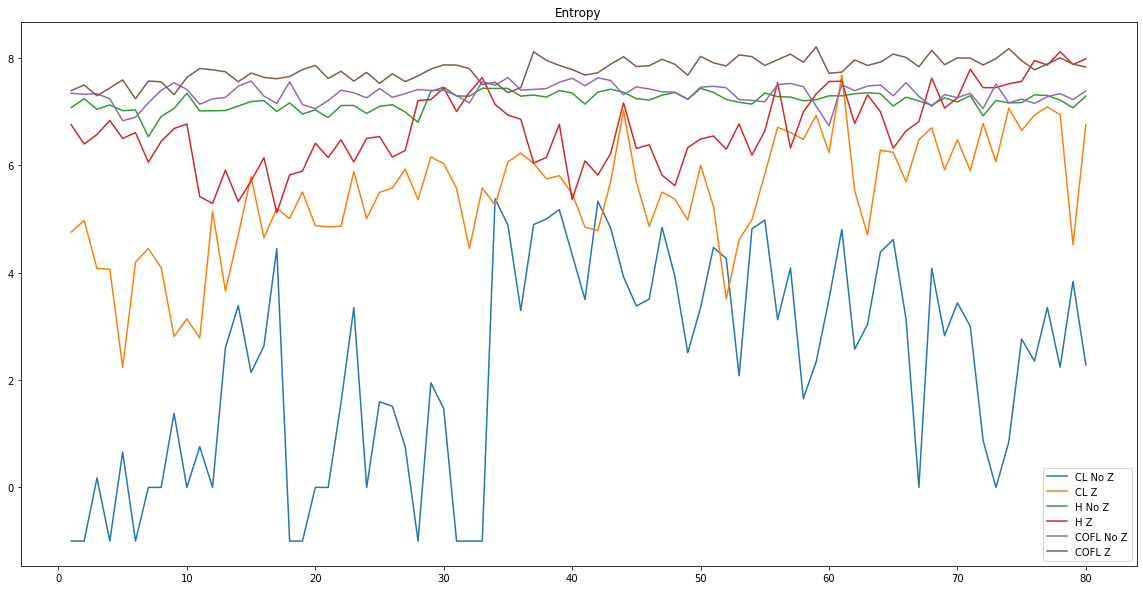

In [38]:
plt.figure(figsize=(20,10))
plt.title("Entropy")
plt.plot(x,en)
plt.plot(x,en_z)
plt.plot(x,en_1_h)
plt.plot(x,en_1_h_z)
plt.plot(x,en_1_cofl)
plt.plot(x,en_1_cofl_z)
plt.legend(["CL No Z","CL Z","H No Z","H Z","COFL No Z","COFL Z"])
plt.show()

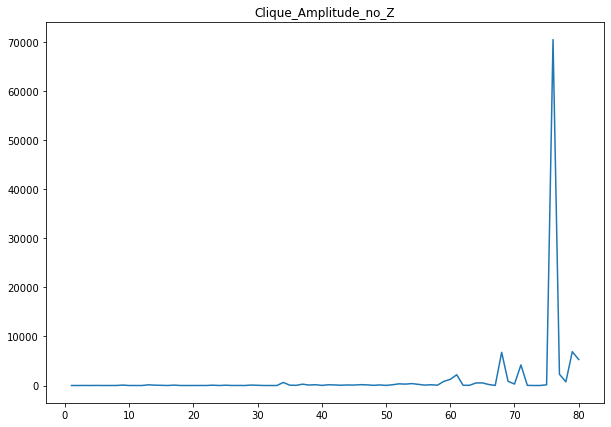

In [39]:
x=range(1,length+1)
plt.figure(figsize=(10,7))
plt.title("Clique_Amplitude_no_Z")
plt.plot(x,am)
plt.show()

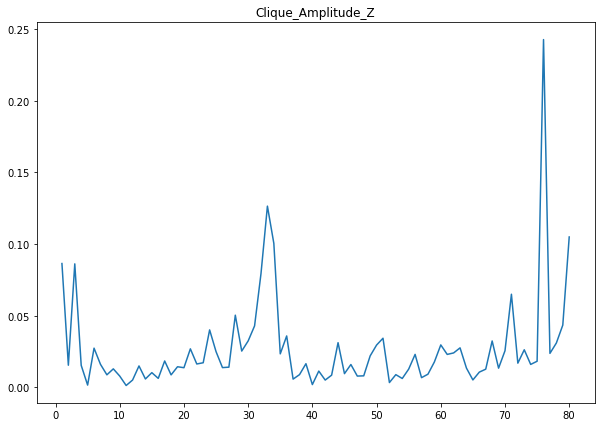

In [40]:
x=range(1,length+1)
plt.figure(figsize=(10,7))
plt.title("Clique_Amplitude_Z")
plt.plot(x,am_z)
plt.show()

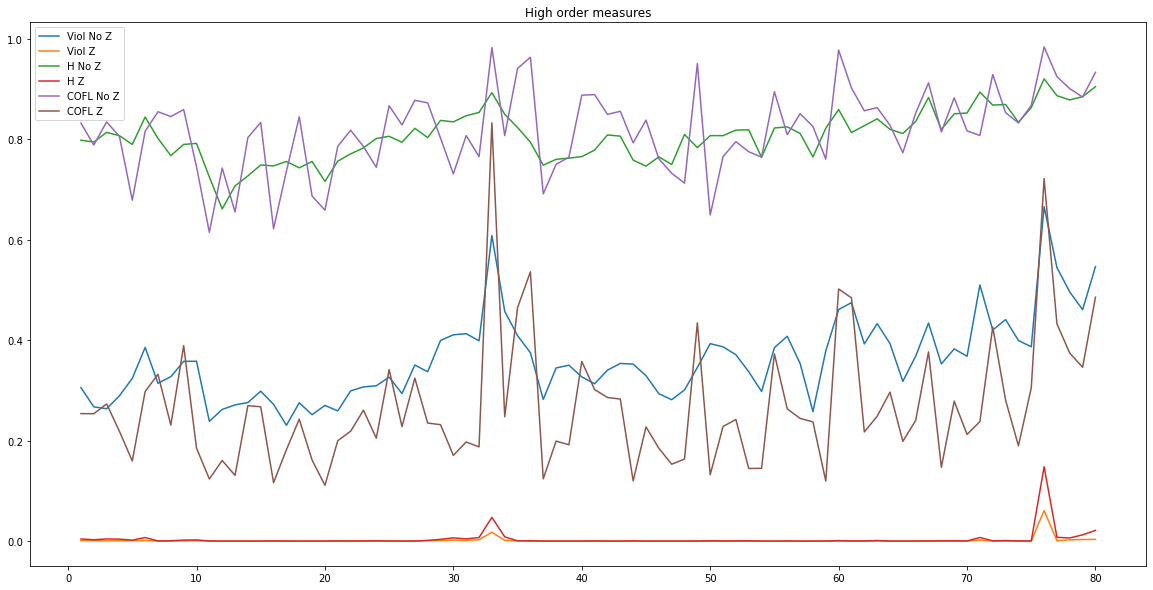

In [43]:
plt.figure(figsize=(20,10))
plt.title("High order measures")
plt.plot(x,viol)
plt.plot(x,viol_z)
plt.plot(x,hyp)
plt.plot(x,hyp_z)
plt.plot(x,hyp_cofl)
plt.plot(x,hyp_cofl_z)
plt.legend(["Viol No Z","Viol Z","H No Z","H Z","COFL No Z","COFL Z"])
plt.show()

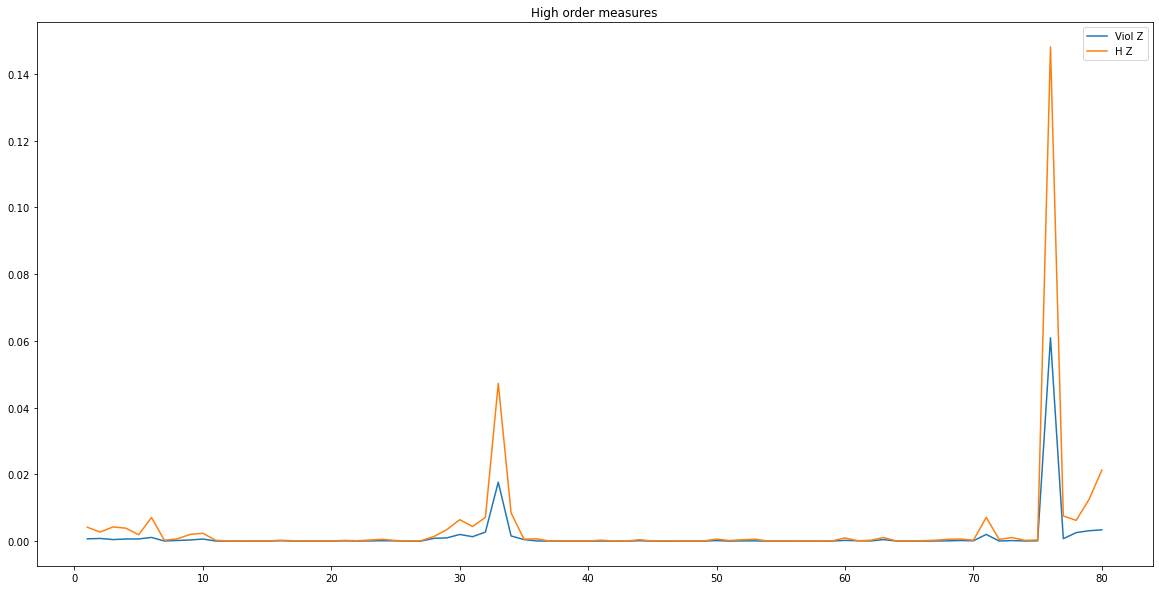

In [44]:
plt.figure(figsize=(20,10))
plt.title("High order measures")

plt.plot(x,viol_z)

plt.plot(x,hyp_z)

plt.legend(["Viol Z","H Z"])
plt.show()

In [47]:
interval=range(0,5400)[1:-1]
en_i,am_i=am_en_i_mod(ts,interval)
en_i_z,am_i_z=am_en_i_mod(ts_z,interval)

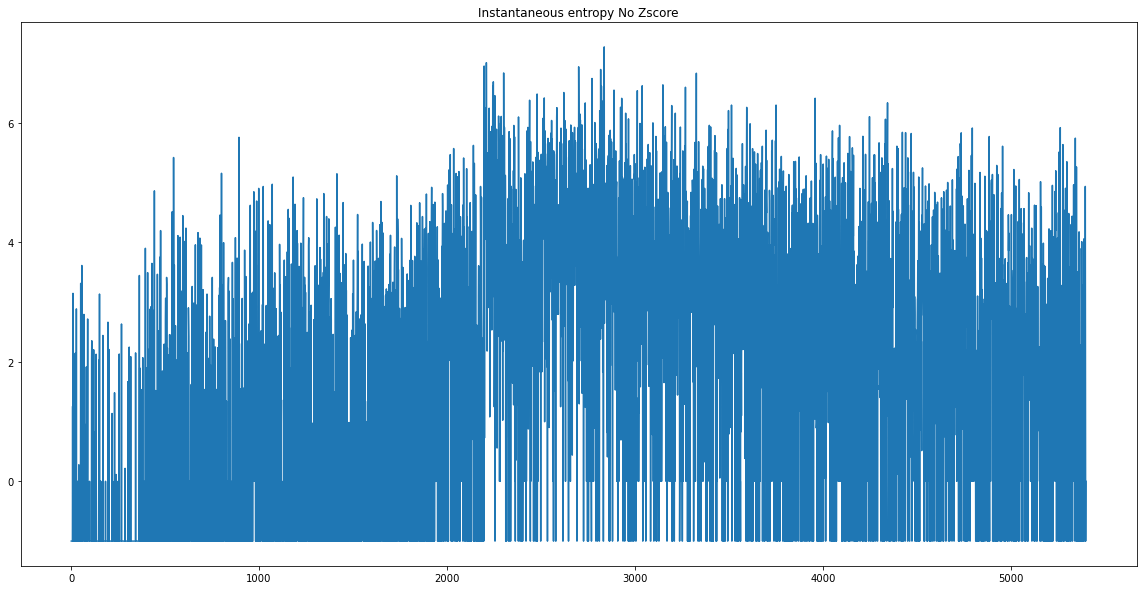

In [50]:
plt.figure(figsize=(20,10))
plt.title("Instantaneous entropy No Zscore")
plt.plot(interval,en_i)
plt.show()

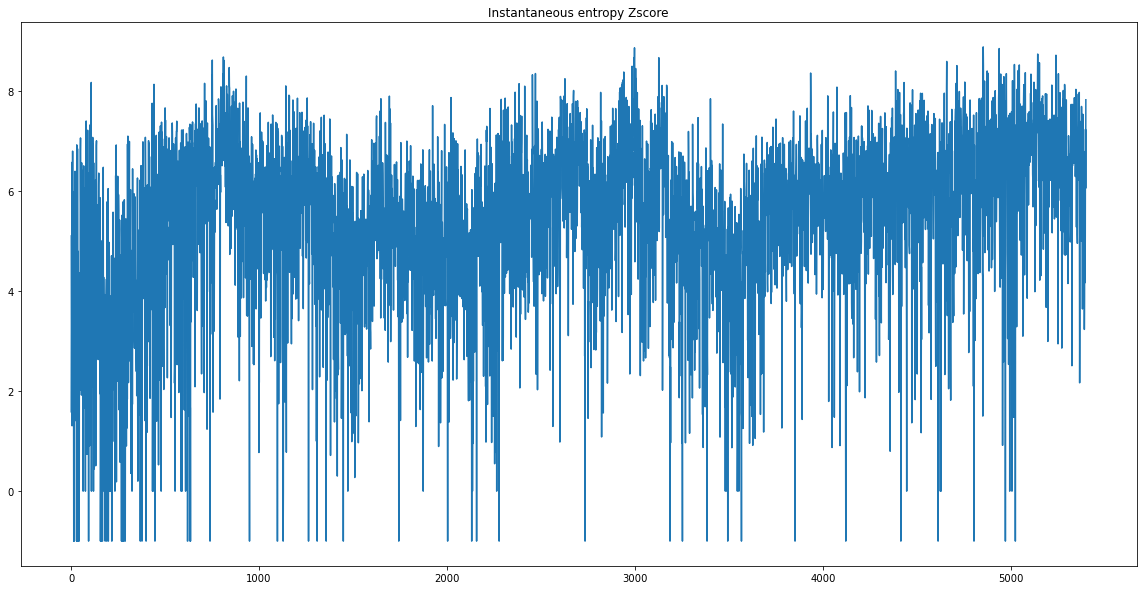

In [51]:
plt.figure(figsize=(20,10))
plt.title("Instantaneous entropy Zscore")
plt.plot(interval,en_i_z)
plt.show()

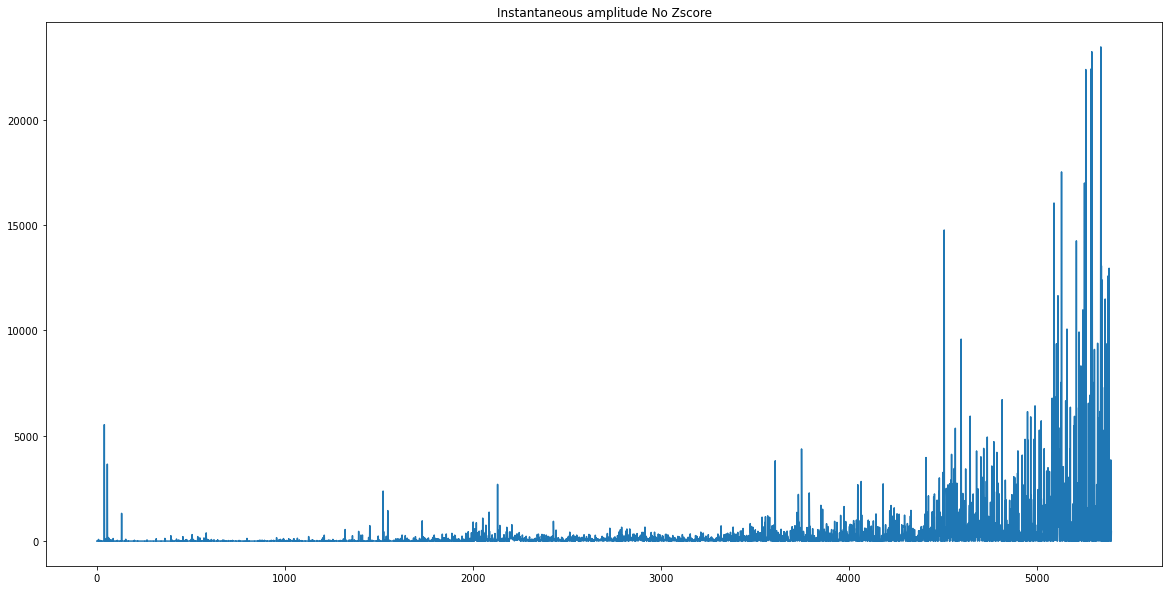

In [52]:
plt.figure(figsize=(20,10))
plt.title("Instantaneous amplitude No Zscore")
plt.plot(interval,am_i)
plt.show()

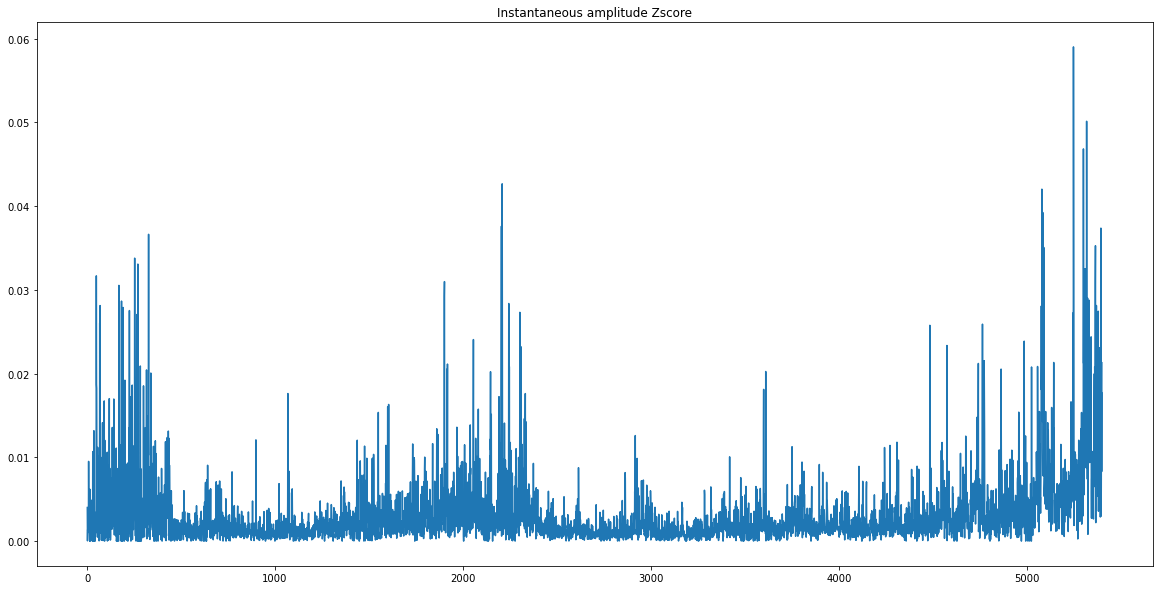

In [53]:
plt.figure(figsize=(20,10))
plt.title("Instantaneous amplitude Zscore")
plt.plot(interval,am_i_z)
plt.show()